In [ ]:
import numpy as np
from google.colab import drive
import os
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
import seaborn as sns

In [ ]:
def mount_drive():
  drive.mount('/content/drive')
  os.chdir('/content/drive/My Drive/Machine Learning Algo Implementations/Linear Regression/Generic Gradient Descent Boston House Price')

In [ ]:
def load_data():
  #mount_drive()
  train_data=pd.read_csv('boston_x_y_train.csv')
  test_data=pd.read_csv('boston_x_test.csv')
  return train_data,test_data

In [ ]:
def step_descent(X,Y,learning_rate,m):
  
  M=X.shape[0]
  N=X.shape[1]

  m_slopes=np.zeros(N) # intializing the slope values of m and c by 0 as we need
                       # to accumulate this for all data points

  for j in range(N):
    for i in range(M):
      m_slopes[j]=m_slopes[j]+(-2/M)*(Y[i]-((m*X[i,:]).sum()))*X[i][j]
  
  new_m=m-learning_rate*m_slopes
  return new_m

In [ ]:
def get_cost_value(X,Y,m):
  
  M=X.shape[0]
  N=X.shape[1]

  cost=0

  for i in range(M):
    cost=cost+(1/M)*(Y[i]-((m*X[i,:]).sum()))**2
  
  return cost

In [ ]:
def get_score(y_true,y_predicted):
  
  numerator=((y_true-y_predicted)**2).sum()
  denominator=((y_true-y_true.mean())**2).sum()
  score=1-numerator/denominator
  return score

In [ ]:
def gradient_descent(X,Y,num_iterations,learning_rate):

  # the shape of X is M*(N+1) here as we are also calculating for c in m only
  # hence we have added an extra column in X which is all 1s

  M=X.shape[0]
  N=X.shape[1]

  cost_values=[] # storing cost_values and m_values to see the graphs of cost
  m_values=[]    # with respect to each m
  
  m=np.zeros(N) # initializing m and c values by 0


  for i in range(num_iterations):
    m=step_descent(X,Y,learning_rate,m)
    cost_value=get_cost_value(X,Y,m)
    m_values.append(m)
    cost_values.append(cost_value)
    print('iteration:',i,'cost value:',cost_value)

  return m,m_values,cost_values

In [ ]:
def predict(x_test,m):
  
  size=x_test.shape[0]
  y_test_predicted=[]

  for i in range(size):
    prediction=(m*x_test[i,:]).sum()
    y_test_predicted.append(prediction)

  return y_test_predicted

In [ ]:
def self_model(train_data,test_data):

  train_data,test_data=load_data()
  
  train_data['For_C']=[1]*train_data.shape[0]
  test_data['For_C']=[1]*test_data.shape[0]
  Y=np.array(train_data[' Y'])
  train_data.drop(' Y',axis=1,inplace=True)
  X=train_data.values
  x_test=test_data.values

  x_train,x_validate,y_train,y_validate=train_test_split(X,Y)

  m,m_values,cost_values=gradient_descent(x_train,y_train,1300,0.1)
  y_validate_predicted=predict(x_validate,m)
  y_test=predict(x_test,m)
  score=get_score(y_validate,y_validate_predicted)
  print('score:',score)

  #y_test_predicted_submit=predict(test_data.values,m)
  return y_test,y_validate_predicted,y_validate,m_values,cost_values

In [ ]:
train_data,test_data=load_data()
y_test,y_validate_predicted,y_validate,m_values,cost_values=self_model(train_data,test_data)

iteration: 0 cost value: 368.8516609958188
iteration: 1 cost value: 242.74568587594388
iteration: 2 cost value: 163.66800186457635
iteration: 3 cost value: 113.53684613314786
iteration: 4 cost value: 81.62179592146937
iteration: 5 cost value: 61.22475447059554
iteration: 6 cost value: 48.13311781284266
iteration: 7 cost value: 39.68881870004107
iteration: 8 cost value: 34.21002971006715
iteration: 9 cost value: 30.629783709394694
iteration: 10 cost value: 28.269400894446697
iteration: 11 cost value: 26.696029551991487
iteration: 12 cost value: 25.632836575256277
iteration: 13 cost value: 24.902248072633256
iteration: 14 cost value: 24.389991999963755
iteration: 15 cost value: 24.02226647206693
iteration: 16 cost value: 23.751209681632453
iteration: 17 cost value: 23.545632182889563
iteration: 18 cost value: 23.3850922413954
iteration: 19 cost value: 23.256099487728235
iteration: 20 cost value: 23.14967638099377
iteration: 21 cost value: 23.059787764399648
iteration: 22 cost value: 22.9

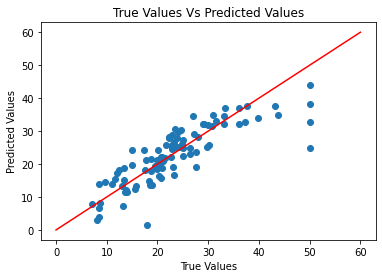

In [ ]:
plt.scatter(y_validate,y_validate_predicted)
x=np.linspace(0,60)
plt.plot(x,x,c='r')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True Values Vs Predicted Values')
plt.show()

In [ ]:
np.savetxt('predictions.csv',y_test)

In [ ]:
m_values_df=pd.DataFrame(m_values)

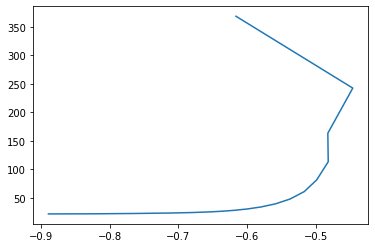

In [ ]:
plt.plot(m_values_df[0],cost_values)
plt.show()

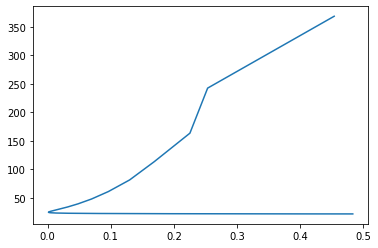

In [ ]:
plt.plot(m_values_df[1],cost_values)
plt.show()

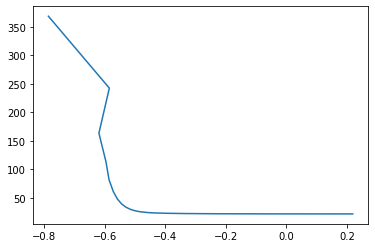

In [ ]:
plt.plot(m_values_df[2],cost_values)
plt.show()

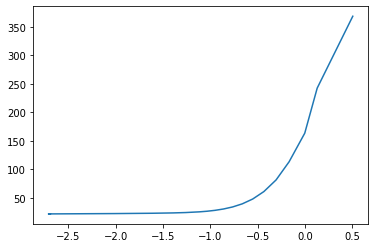

In [ ]:
plt.plot(m_values_df[7],cost_values)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
def sklearn_model(train_data,test_data):

  train_data,test_data=load_data()

  Y=train_data[' Y']
  train_data.drop(' Y',axis=1,inplace=True)
  X=train_data.values

  x_train,x_test,y_train,y_test=train_test_split(X,Y)
  clf=LinearRegression()
  clf.fit(x_train,y_train)
  true_values=clf.predict(test_data.values)
  print(clf.score(x_test,y_test))
  return true_values

In [ ]:
train_data,test_data=load_data()
true_values=sklearn_model(train_data,test_data)

0.6891574461986358


In [ ]:
np.savetxt('true.csv',true_values)